# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 
#from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric" + '&appid=' + weather_api_key + '&q='
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Metric&appid=31f90f031d05f9d41fc8c6eec3fc442e&q=


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
    
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuuk
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | dryden
Processing Record 5 of Set 1 | khvansar
Processing Record 6 of Set 1 | nadi
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | bilimbay
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | limon
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | papao
Processing Record 15 of Set 1 | hanzhong
Processing Record 16 of Set 1 | cururupu
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | pemangkat
Processing Record 22 of Set 1 | bilibino
Processing Record 23 of Set 1 | iqaluit
Processing

Processing Record 41 of Set 4 | boa vista
Processing Record 42 of Set 4 | island harbour
Processing Record 43 of Set 4 | bayan
Processing Record 44 of Set 4 | siracusa
Processing Record 45 of Set 4 | kirensk
Processing Record 46 of Set 4 | kapiri mposhi
Processing Record 47 of Set 4 | acarau
Processing Record 48 of Set 4 | betioky
Processing Record 49 of Set 4 | i-n-salah
Processing Record 0 of Set 5 | charlottetown
Processing Record 1 of Set 5 | nadym
Processing Record 2 of Set 5 | el-tor
Processing Record 3 of Set 5 | puerto leguizamo
Processing Record 4 of Set 5 | totness
Processing Record 5 of Set 5 | boulsa
Processing Record 6 of Set 5 | punta arenas
Processing Record 7 of Set 5 | rongelap
Processing Record 8 of Set 5 | port saint john's
Processing Record 9 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 10 of Set 5 | hotan
Processing Record 11 of Set 5 | shingu
Processing Record 12 of Set 5 | keflavik
Processing Record 13 of Set 5 | puerto san carlos
City not 

Processing Record 35 of Set 8 | freetown
Processing Record 36 of Set 8 | mejit
Processing Record 37 of Set 8 | sarupathar
Processing Record 38 of Set 8 | cooper's town
Processing Record 39 of Set 8 | taltal
Processing Record 40 of Set 8 | wabag
Processing Record 41 of Set 8 | nouadhibou
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | espargos
City not found. Skipping...
Processing Record 44 of Set 8 | mitu
Processing Record 45 of Set 8 | longyearbyen
Processing Record 46 of Set 8 | kzyltu
Processing Record 47 of Set 8 | wenling
Processing Record 48 of Set 8 | palikir - national government center
Processing Record 49 of Set 8 | batangafo
Processing Record 0 of Set 9 | laohekou
Processing Record 1 of Set 9 | vila franca do campo
Processing Record 2 of Set 9 | talnakh
Processing Record 3 of Set 9 | barra de santo antonio
Processing Record 4 of Set 9 | borgonovo valtidone
Processing Record 5 of Set 9 | dhidhdhoo
Processing Record 6 of Set 9 | lefka
Processing Recor

Processing Record 26 of Set 12 | colipapa
Processing Record 27 of Set 12 | taunggyi
Processing Record 28 of Set 12 | jijiga
Processing Record 29 of Set 12 | katsuren-haebaru
Processing Record 30 of Set 12 | maintirano
Processing Record 31 of Set 12 | horta
Processing Record 32 of Set 12 | danilov
Processing Record 33 of Set 12 | ewo
Processing Record 34 of Set 12 | malango
Processing Record 35 of Set 12 | shiguai
Processing Record 36 of Set 12 | nar'yan-mar
Processing Record 37 of Set 12 | sola
Processing Record 38 of Set 12 | mesquite
Processing Record 39 of Set 12 | ambovombe
Processing Record 40 of Set 12 | waddan
Processing Record 41 of Set 12 | lithgow
Processing Record 42 of Set 12 | chongqing
Processing Record 43 of Set 12 | yeniseysk
Processing Record 44 of Set 12 | hong kong
Processing Record 45 of Set 12 | magistral'nyy
Processing Record 46 of Set 12 | tafuna
Processing Record 47 of Set 12 | puerto armuelles
Processing Record 48 of Set 12 | kargasok
Processing Record 49 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Latitude      588
Longitude     588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuuk,64.1835,-51.7216,5.34,65,75,1.03,GL,1682004270
1,avarua,-21.2078,-159.7750,24.03,73,75,5.66,CK,1682004270
2,grytviken,-54.2811,-36.5092,1.83,99,100,0.75,GS,1682004271
3,dryden,49.7833,-92.7503,0.16,43,100,6.17,CA,1682004271
4,khvansar,33.2205,50.3150,16.75,27,90,2.24,IR,1682004271


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.1835,-51.7216,5.34,65,75,1.03,GL,1682004270
1,avarua,-21.2078,-159.7750,24.03,73,75,5.66,CK,1682004270
2,grytviken,-54.2811,-36.5092,1.83,99,100,0.75,GS,1682004271
3,dryden,49.7833,-92.7503,0.16,43,100,6.17,CA,1682004271
4,khvansar,33.2205,50.3150,16.75,27,90,2.24,IR,1682004271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

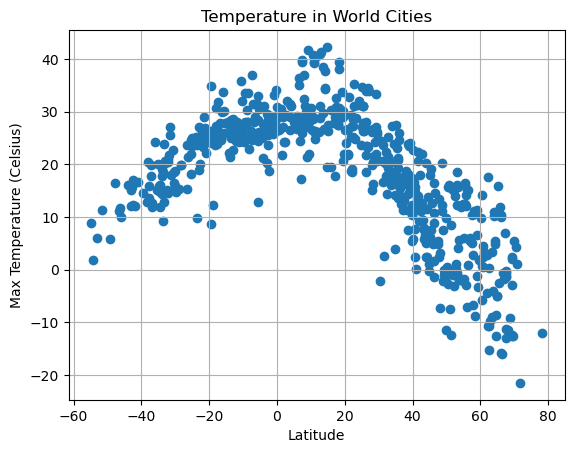

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

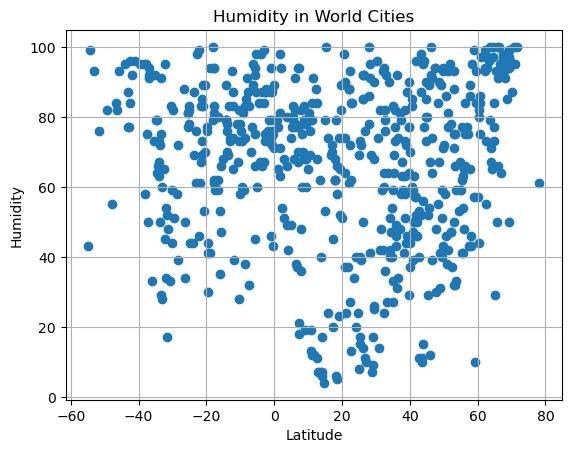

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o")

# Incorporate the other graph properties

plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

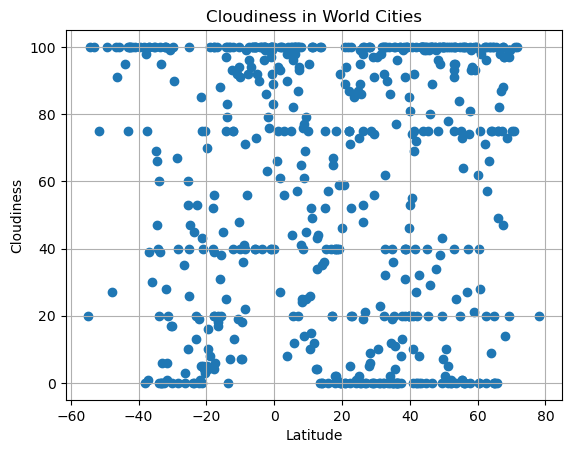

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

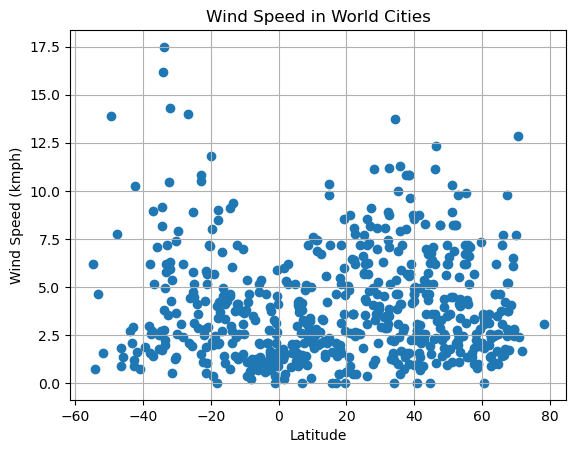

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (kmph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, y_label, title, corr):

    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    corr_coeff, p_value = st.pearsonr(x_values, y_values)



    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color='steelblue')
    plt.plot(x_values,regress_values,"hotpink")
    plt.annotate(line_eq, corr,fontsize=15,color="black")

    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.show()
    print(f"Correlation coefficient: {corr_coeff:.2f}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame([city for city in city_data if city['Latitude'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuuk,64.1835,-51.7216,5.34,65,75,1.03,GL,1682004270
1,dryden,49.7833,-92.7503,0.16,43,100,6.17,CA,1682004271
2,khvansar,33.2205,50.3150,16.75,27,90,2.24,IR,1682004271
3,fortuna,40.5982,-124.1573,7.77,85,55,2.24,US,1682004272
4,bilimbay,56.9689,59.8149,5.38,77,27,1.36,RU,1682004273


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame([city for city in city_data if city['Latitude'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,24.03,73,75,5.66,CK,1682004270
1,grytviken,-54.2811,-36.5092,1.83,99,100,0.75,GS,1682004271
2,nadi,-17.8000,177.4167,24.00,94,20,2.06,FJ,1682004272
3,papao,-17.7500,-149.5500,26.82,81,100,9.00,PF,1682004275
4,cururupu,-1.8283,-44.8683,29.10,76,79,0.79,BR,1682004276


###  Temperature vs. Latitude Linear Regression Plot

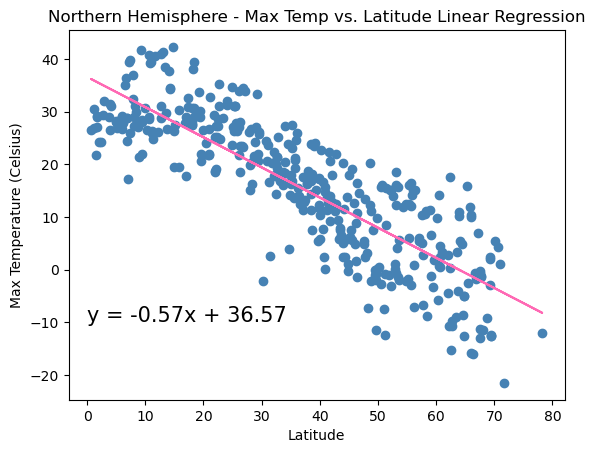

Correlation coefficient: -0.84


In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temperature (Celsius)"
corr = (0,-10)

plot_linear_regression(x_values, y_values, y_label, title, corr)

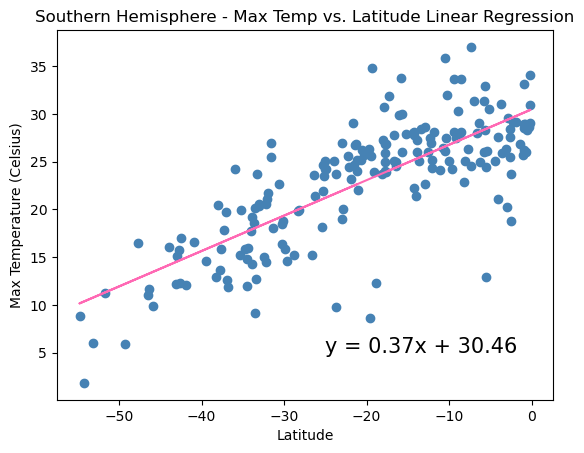

Correlation coefficient: 0.78


In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp"]
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temperature (Celsius)"
corr = (-25,5)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** There is a stong negative linear relationship in the Northern Hemisphere and a strong positive linear relationship in the Southern Hemisphere. Although it will not be exact, you should be able to use this regression to dependbly predict the temp of the the city based on the latitude in both the northern and southern hemishperes.

### Humidity vs. Latitude Linear Regression Plot

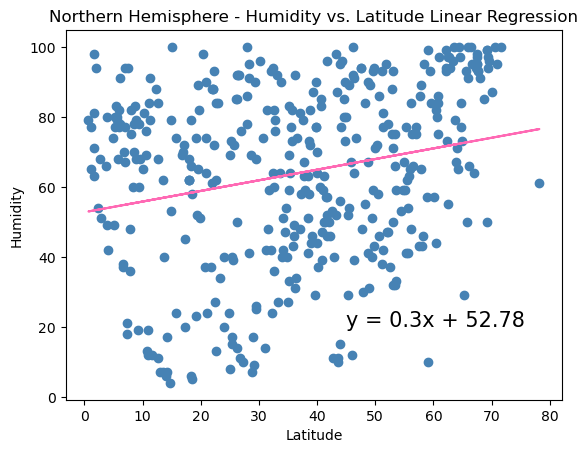

Correlation coefficient: 0.23


In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
y_label = "Humidity"
corr = (45,20)

plot_linear_regression(x_values, y_values, y_label, title, corr)

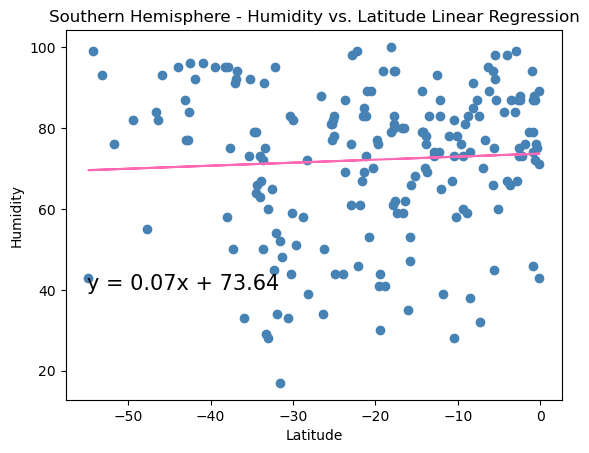

Correlation coefficient: 0.06


In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
y_label = "Humidity"
corr = (-55,40)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** While there is some linear relationship going on here in the Northern Hemisphere, it is weak. In the Southern Hemisphere, there is almost no relationship and when there is one, it is very weak. It would not rely on either to accuratley perdict the humitity based on the city' latitude.

### Cloudiness vs. Latitude Linear Regression Plot

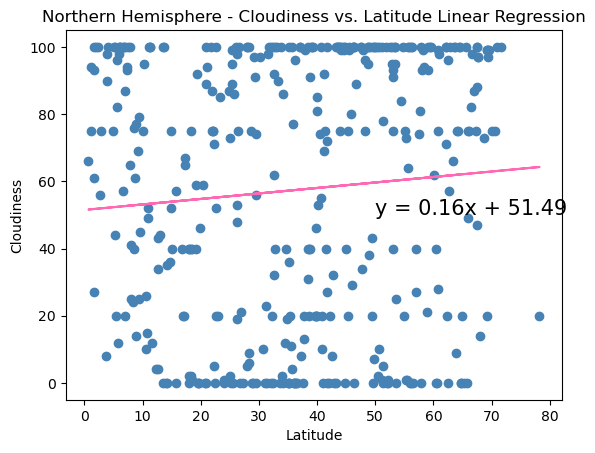

Correlation coefficient: 0.08


In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
y_label = "Cloudiness"
corr = (50,50)

plot_linear_regression(x_values, y_values, y_label, title, corr)

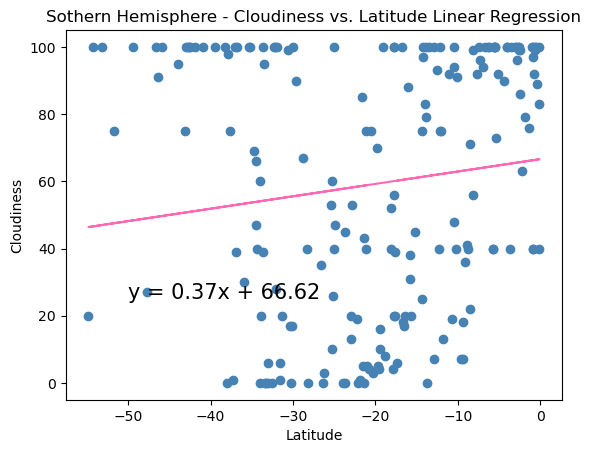

Correlation coefficient: 0.13


In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
title = "Sothern Hemisphere - Cloudiness vs. Latitude Linear Regression"
y_label = "Cloudiness"
corr = (-50, 25)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** According to the correlation coefficient in both the Northern and Southern Hemispheres, there is almost no correlation between the the city's latitude and the cloudiness taken as a whole.

### Wind Speed vs. Latitude Linear Regression Plot

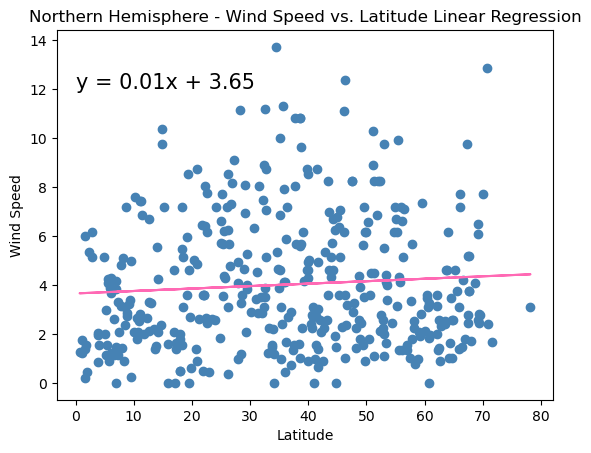

Correlation coefficient: 0.07


In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
y_label = "Wind Speed"
corr = (0,12)

plot_linear_regression(x_values, y_values, y_label, title, corr)

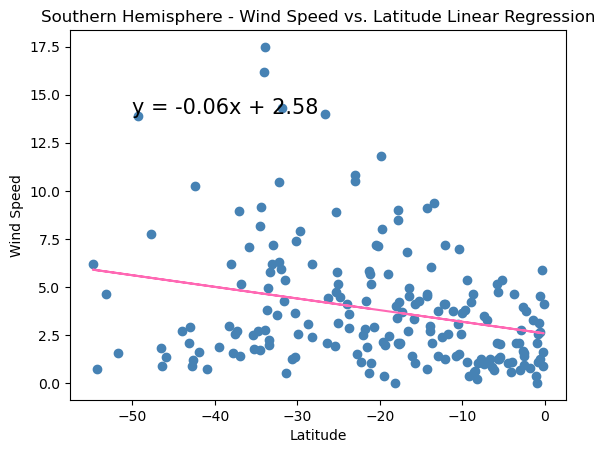

Correlation coefficient: -0.27


In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
y_label = "Wind Speed"
corr = (-50,14)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** Again, in the Northern Hemishphere, there is almost no linear relationship between the wind speed and the city's latitude. However, there is a weak correlation in the Southern Hemisphere. That said, I would not use either line to accurately perdict the wind speed in either the Northern or Southern Hemisphere.